<a href="https://colab.research.google.com/github/RAIHANRABBY/A-Machine-Learning/blob/main/student_dropout_system_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sdos/studendropoutsystem.csv',index_col=False)

## Feature engineering

In [77]:
df.rename({'Home Language':'Language','Father Occupation':'F_occu','Mother Occupation':'M_occu', 
           'Number Of Siblings':'N_of_Sib', 'Father Education':'F_edu','Mother Education':'M_edu',
           'School Distance':'S_Dis', 'Means to school':'M_t_School','House Lighting':'H_Light',
           'School Infrustructure':'Scl_infra', 'School Meal per day':'M_por_d','School Cost':'Scl_cost',
           'Family income source':'income_Src','Family Annual income':'A_income', 'Extra Tution':'tution', 
           'Hours of study per day':'Hour_study','Class Label':'Dropout','Attendance Parcentage':'Attended'},axis=1,inplace=True)

In [78]:
df.columns

Index(['Unnamed: 0', 'Age', 'Gender', 'Language', 'F_occu', 'M_occu',
       'N_of_Sib', 'F_edu', 'M_edu', 'S_Dis', 'M_t_School', 'H_Light',
       'Scl_infra', 'M_por_d', 'Scl_cost', 'income_Src', 'Bangla', 'English',
       'Math', 'Science', 'History', 'Social Science', 'Religious Study',
       'A_income', 'tution', 'Hour_study', 'Dropout', 'GPA', 'Attended'],
      dtype='object')

In [79]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [80]:
df.Dropout.replace('Yes ','Yes',inplace=True)

In [81]:
df.Dropout.unique()

array(['No', 'Yes'], dtype=object)

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [83]:

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    else:
        df[col]=le.fit_transform(df[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


In [84]:
df.head()

,Age,Gender,Language,F_occu,M_occu,N_of_Sib,F_edu,M_edu,S_Dis,M_t_School,...,Science,History,Social Science,Religious Study,A_income,tution,Hour_study,Dropout,GPA,Attended
0,1,0,0,3,3,0,4,4,2,2,...,22,15,5,9,6,1,2,0,2.01,74.7
1,0,1,0,2,3,2,0,4,1,0,...,30,34,36,71,0,1,0,0,3.04,74.2
2,1,0,0,4,3,2,3,4,6,2,...,70,23,61,11,18,1,0,0,3.08,67.6
3,1,0,0,5,2,2,3,4,0,4,...,34,30,0,62,7,1,0,0,2.40,60.7
4,0,1,0,5,3,1,0,3,2,4,...,12,13,8,61,11,0,2,0,2.19,56.0


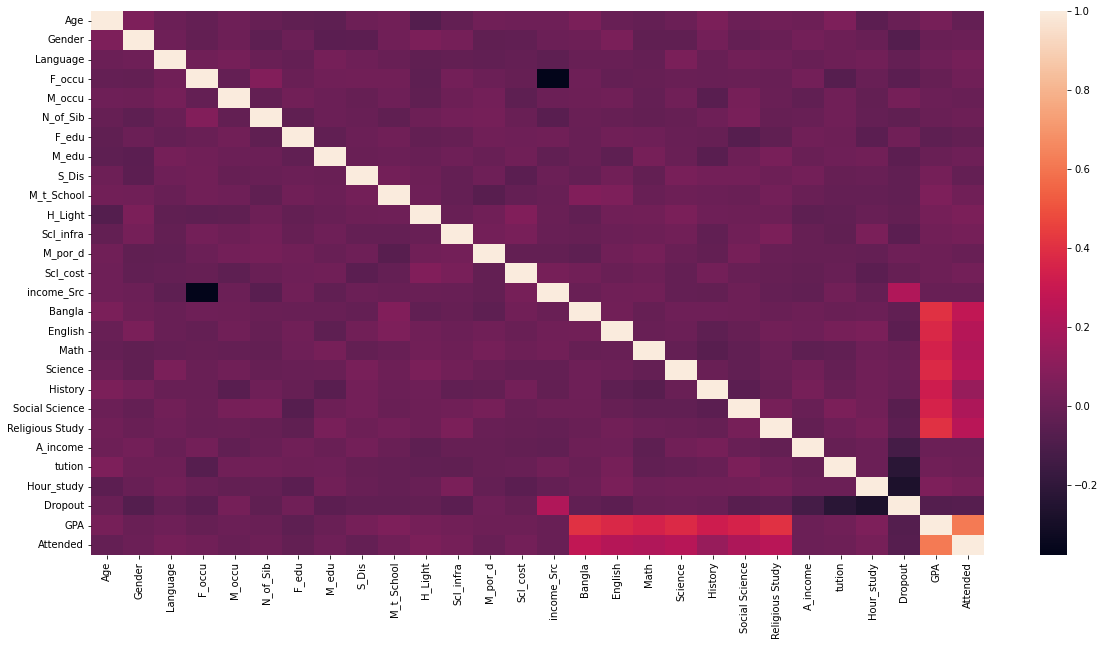

In [85]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Coorelation')

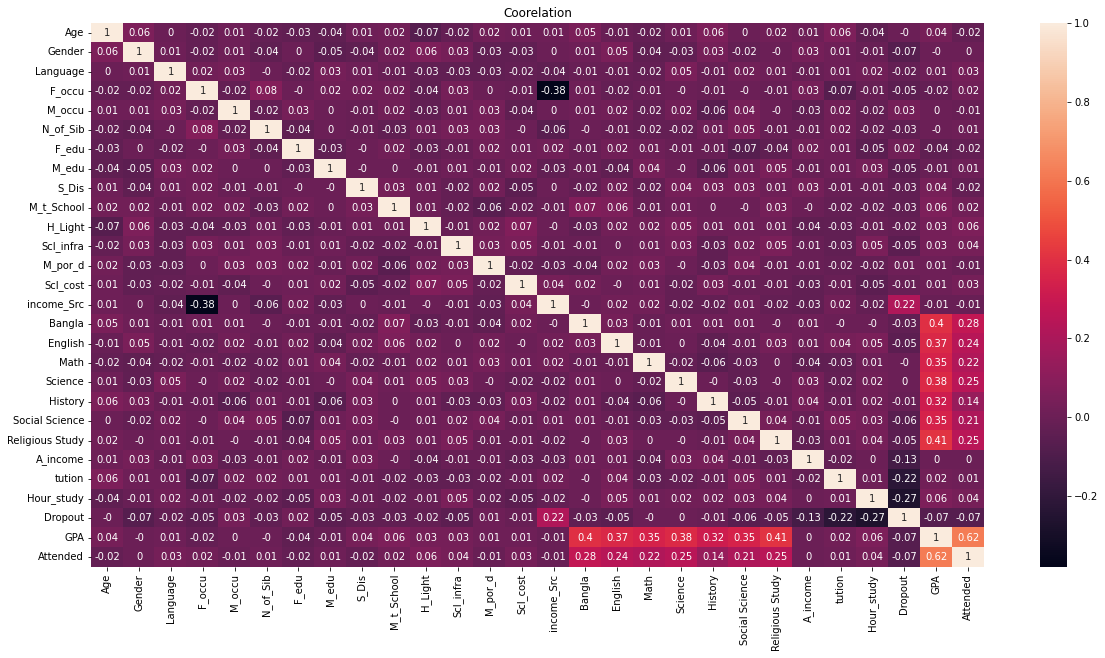

In [86]:
corr=df.corr().round(2)
plt.figure(figsize=(20,10))
plot=sns.heatmap(corr,annot=True)
plt.title('Coorelation')

In [87]:
x=df.drop('Dropout',axis=1)
y=df['Dropout']

In [88]:
df.Dropout.unique()

array([0, 1])

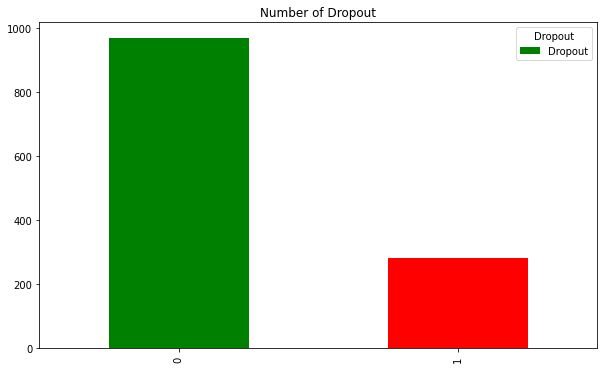

In [89]:

plt.figure(figsize=(10,6))
plt.title('Number of Dropout')

y.value_counts().plot(kind='bar',color=['green','red'])
plt.legend(title='Dropout')
plt.show()

## train test split

In [90]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=45)

In [91]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info

array([0.        , 0.        , 0.0086818 , 0.04617798, 0.02303309,
       0.00313548, 0.        , 0.        , 0.00511256, 0.        ,
       0.        , 0.01657474, 0.00959375, 0.        , 0.05557697,
       0.        , 0.        , 0.00051006, 0.        , 0.00811749,
       0.00118302, 0.00069438, 0.01437313, 0.04326884, 0.09654414,
       0.00582595, 0.0133868 ])

In [92]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=xtrain.columns
mutual_info.sort_values(ascending=False)

Hour_study         0.096544
income_Src         0.055577
F_occu             0.046178
tution             0.043269
M_occu             0.023033
Scl_infra          0.016575
A_income           0.014373
Attended           0.013387
M_por_d            0.009594
Language           0.008682
History            0.008117
GPA                0.005826
S_Dis              0.005113
N_of_Sib           0.003135
Social Science     0.001183
Religious Study    0.000694
Math               0.000510
Science            0.000000
Age                0.000000
English            0.000000
Bangla             0.000000
Gender             0.000000
H_Light            0.000000
M_t_School         0.000000
M_edu              0.000000
F_edu              0.000000
Scl_cost           0.000000
dtype: float64

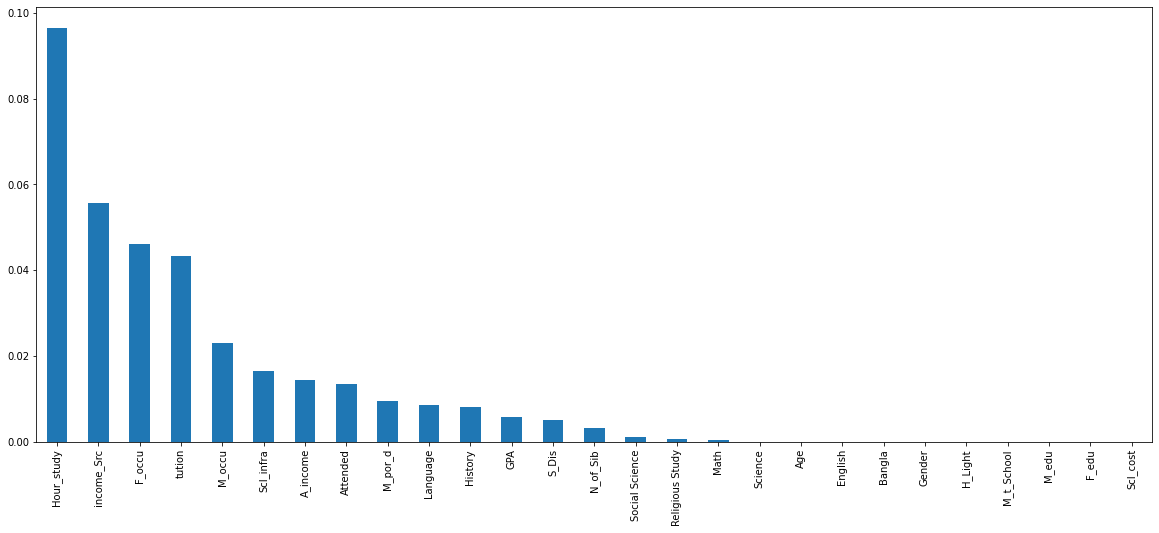

In [93]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

## Model Implementation

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [183]:
models={
    'RF':RandomForestClassifier(),
'adaBoost':AdaBoostClassifier(),
'GBC':GradientBoostingClassifier(),
'ExtraTree': ExtraTreesClassifier(),
'DT':DecisionTreeClassifier(),
'BNB':BernoulliNB(),
'MNB':MultinomialNB(),
'GNB':GaussianNB(),
'KNN':KNeighborsClassifier(),
'SVM':SVC(),
'LR':LogisticRegression()
}

In [184]:
# Training the models 
for k,v in models.items():
  v.fit(xtrain,ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [185]:
pred=models['RF'].predict(xtest)

In [186]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[289,   0],
       [ 23,  64]])

In [187]:

for k,v in models.items():
  print(k,'  :  ',v.score(xtrain,ytrain))

RF   :   1.0
adaBoost   :   0.896
GBC   :   0.9954285714285714
ExtraTree   :   1.0
DT   :   1.0
BNB   :   0.8468571428571429
MNB   :   0.7051428571428572
GNB   :   0.8388571428571429
KNN   :   0.8182857142857143
SVM   :   0.7771428571428571
LR   :   0.8297142857142857


In [188]:
#drowing roc curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
def plot_roc_curve(models,x_dtest,y_dtest):
  pred_d={}
  for k,v in models.items():
    pred_d[k]=v.predict(x_dtest)
  

  rocScore={}
  for k,v in pred_d.items():
    rocScore[k]=roc_auc_score(y_dtest,v)

  fp_tp_d={}
  for k,v in pred_d.items():
    fpr,tpr,_=roc_curve(y_dtest,v)
    fp_tp_d[k]={'fpr':fpr,'tpr':tpr}

  plt.figure(figsize=(15,8))
  plt.title('Roc Curve')
  for k,v in fp_tp_d.items():
    plt.plot(v['fpr'],v['tpr'],marker='.',label= k+": %.3f"%rocScore[k])
    plt.xlabel('False positive Rate')
    plt.ylabel('True POsitive Rate')
    
    plt.legend()
    
  plt.show()

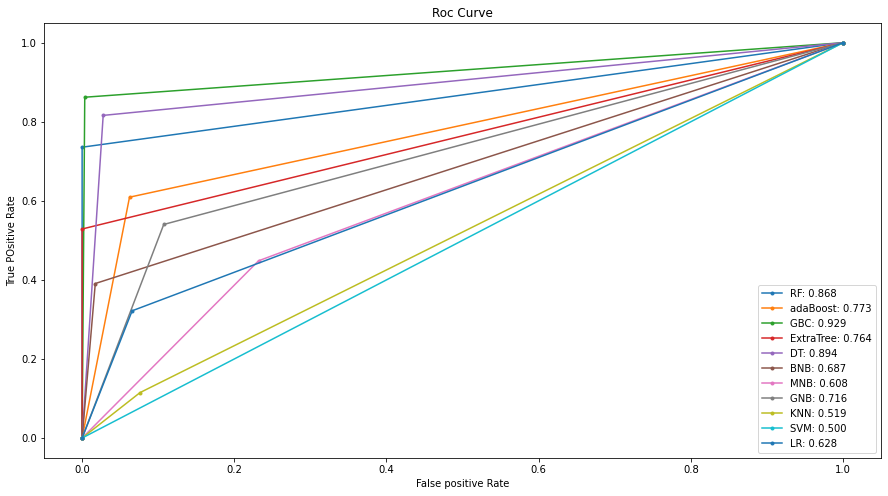

In [189]:
plot_roc_curve(models,xtest,ytest)

In [190]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       289
           1       1.00      0.74      0.85        87

    accuracy                           0.94       376
   macro avg       0.96      0.87      0.90       376
weighted avg       0.94      0.94      0.94       376



In [191]:
#k fold cross validation

In [192]:
from sklearn.model_selection import cross_val_score

In [193]:
cv_score = cross_val_score(models['RF'],x,y,cv=10)

In [194]:
sum(cv_score)/10

0.9472571428571429

# over sampling

In [195]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
x_res,y_res=ns.fit_resample(x,y)
print(Counter(y_res))

Counter({0: 352, 1: 282})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [196]:
# from imblearn.over_sampling import RandomOverSampler
# ovs=RandomOverSampler(random_state=42)
# x_res,y_res=ovs.fit_resample(x,y)

In [197]:
xotrain,xotest,yotrain,yotest=train_test_split(x_res,y_res,test_size=.3,random_state=45)

In [198]:
RF=RandomForestClassifier()
RF.fit(xotrain,yotrain)

RandomForestClassifier()

In [199]:
preds=RF.predict(xotest)

In [200]:
from sklearn.metrics import accuracy_score
accuracy_score(yotest,preds)

0.9109947643979057

In [201]:
xtest

,Age,Gender,Language,F_occu,M_occu,N_of_Sib,F_edu,M_edu,S_Dis,M_t_School,...,Math,Science,History,Social Science,Religious Study,A_income,tution,Hour_study,GPA,Attended
924,1,0,0,7,7,2,2,4,1,3,...,18,45,70,66,24,3,0,3,3.35,80.5
964,0,1,0,7,3,3,2,4,6,4,...,27,44,44,8,4,1,1,4,2.54,51.3
1192,0,0,0,1,3,3,3,3,1,3,...,27,32,54,29,2,8,0,2,2.44,73.8
847,1,0,0,4,3,2,0,0,5,0,...,60,28,70,37,41,18,0,3,3.19,72.5
381,1,0,0,4,7,2,3,4,6,4,...,8,41,15,40,69,12,0,2,3.09,90.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,7,3,2,4,3,0,0,...,2,16,62,2,45,0,0,3,2.03,73.4
96,1,1,0,0,3,3,3,2,0,0,...,52,25,67,70,46,6,0,4,3.30,82.6
1248,0,1,1,4,2,2,2,4,3,3,...,5,5,35,31,55,18,0,4,2.32,59.2
652,0,1,0,1,3,2,0,4,1,3,...,59,58,67,28,19,2,0,3,3.12,88.1


In [202]:
print(classification_report(yotest,preds))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       108
           1       0.93      0.86      0.89        83

    accuracy                           0.91       191
   macro avg       0.91      0.90      0.91       191
weighted avg       0.91      0.91      0.91       191



In [203]:
RF.score(xotest,yotest)

0.9109947643979057

In [204]:
for k,v in models.items():
  v.fit(xotrain,yotrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [205]:
for k,v in models.items():
  print(k,'  :  ',v.score(xotrain,yotrain))

RF   :   1.0
adaBoost   :   0.8939051918735892
GBC   :   0.9932279909706546
ExtraTree   :   1.0
DT   :   1.0
BNB   :   0.708803611738149
MNB   :   0.6523702031602708
GNB   :   0.781038374717833
KNN   :   0.6388261851015802
SVM   :   0.6455981941309256
LR   :   0.7358916478555305


In [206]:
for k,v in models.items():
  print(k,'  :  ',v.score(xotest,yotest))

RF   :   0.900523560209424
adaBoost   :   0.774869109947644
GBC   :   0.9738219895287958
ExtraTree   :   0.8534031413612565
DT   :   0.9267015706806283
BNB   :   0.6858638743455497
MNB   :   0.5863874345549738
GNB   :   0.743455497382199
KNN   :   0.5026178010471204
SVM   :   0.6020942408376964
LR   :   0.6963350785340314


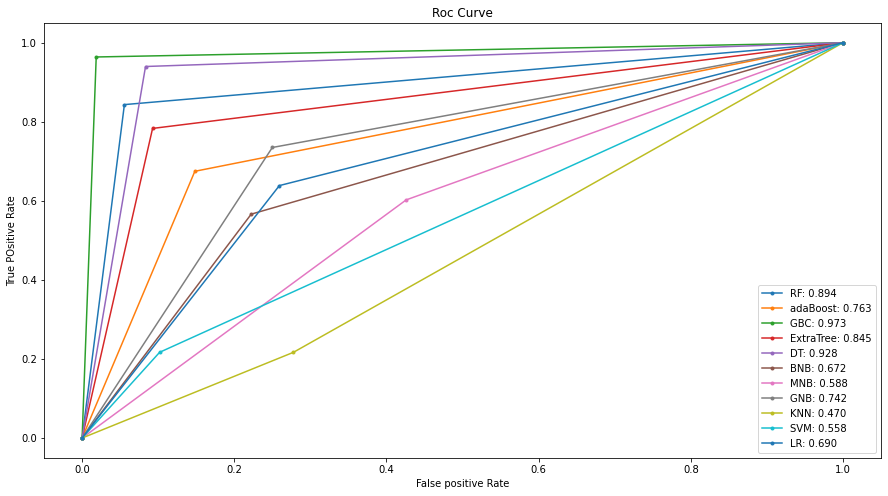

In [207]:
plot_roc_curve(models,xotest,yotest)

In [210]:
testaccuracy={}
from sklearn.metrics import precision_score,recall_score,f1_score
def acuracyTest(model,xtest,ytest,xtrain,ytrain):
  test_accuracy=0
  test_accuracy=model.score(xtest,ytest)
  print('test accuracy')

  train_accuracy=0
  train_accuracy=model.score(xtrain,ytrain)

  pred=model.predict(xtest)

  precision=precision_score(ytest,pred)
  recall=recall_score(ytest,pred)
  f1=f1_score(ytest,pred)
  cMetrix=confusion_matrix(ytest,pred)
  return {'test':test_accuracy,'train':train_accuracy, 'p':precision,'r':recall,'f1':f1,'confusionM':cMetrix}



In [211]:
acuracyTest(RF,xotest,yotest,xotrain,yotrain)

test accuracy


{'test': 0.9109947643979057,
 'train': 1.0,
 'p': 0.9342105263157895,
 'r': 0.8554216867469879,
 'f1': 0.8930817610062893,
 'confusionM': array([[103,   5],
        [ 12,  71]])}